In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\user\Documents\python\round2\clean_dataset.csv')

In [3]:
X = df.iloc[:, 2:]
y = df['label']

In [4]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=50) 
X_rfe = rfe.fit_transform(X, y)

selected_columns = X.columns[rfe.support_]


c:\Users\user\Documents\python\round1\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\Documents\python\round1\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [5]:
selected_columns

Index(['SHORT_TERM_COUNT_BANK', 'SHORT_TERM_COUNT_NON_BANK', 'NUMBER_OF_LOANS',
       'NUMBER_OF_LOANS_BANK', 'NUMBER_OF_LOANS_NON_BANK',
       'NUMBER_OF_CREDIT_CARDS', 'NUMBER_OF_CREDIT_CARDS_BANK',
       'NUMBER_OF_RELATIONSHIP', 'NUMBER_OF_RELATIONSHIP_BANK',
       'NUMBER_OF_RELATIONSHIP_NON_BANK', 'NUM_NEW_LOAN_TAKEN_6M',
       'NUM_NEW_LOAN_TAKEN_9M', 'NUM_NEW_LOAN_TAKEN_12M',
       'NUM_NEW_LOAN_TAKEN_BANK_6M', 'NUM_NEW_LOAN_TAKEN_BANK_9M',
       'NUM_NEW_LOAN_TAKEN_BANK_12M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_6M',
       'NUM_NEW_LOAN_TAKEN_NON_BANK_9M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_12M',
       'OUTSTANDING_BAL_LOAN_6M_12M', 'OUTSTANDING_BAL_CC_3M_6M',
       'OUTSTANDING_BAL_ALL_9M_12M', 'INCREASING_BAL_3M_LOAN',
       'INCREASING_BAL_6M_LOAN', 'INCREASING_BAL_3M_CC',
       'INCREASING_BAL_6M_CC', 'INCREASING_BAL_3M_ALL',
       'INCREASING_BAL_6M_ALL', 'CREDIT_CARD_MONTH_SINCE_10DPD',
       'CREDIT_CARD_MONTH_SINCE_30DPD', 'ENQUIRIES_6M', 'ENQUIRIES_12M',
       'ENQUI

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
seed = 2023
models = [
    LinearSVC(max_iter=12000, random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(algorithm='SAMME'),
    XGBClassifier(eval_metric='logloss', random_state=seed)
]

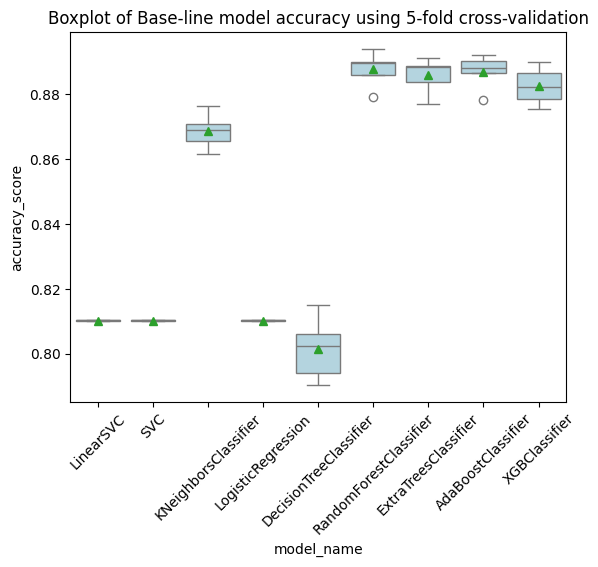

,Mean,Standard Deviation
model_name,,
RandomForestClassifier,0.887758,0.005619
AdaBoostClassifier,0.887066,0.005355
ExtraTreesClassifier,0.885841,0.005650
XGBClassifier,0.882591,0.005816
KNeighborsClassifier,0.868688,0.005577
LogisticRegression,0.810249,0.000118
LinearSVC,0.810249,0.000118
SVC,0.810249,0.000118
DecisionTreeClassifier,0.801565,0.009756


In [7]:
from sklearn.model_selection import StratifiedKFold

def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
    #define k-fold
    kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
            
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])
    

    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
        plt.title('Boxplot of Base-line model accuracy using 5-fold cross-validation')
        plt.xticks(rotation=45)
        plt.show()
    
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    
    baseline_results = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_results.columns = ['Mean', 'Standard Deviation']
    
    baseline_results.sort_values(by='Mean', ascending=False, inplace=True)
        
    return baseline_results
        
        
        
generate_baseline_results(models, X_rfe, y, metrics='accuracy', cv=5, plot_results=True)